
All of the questions in this document refer to the dataset "income_prediction.data".   This is a data set used for classification. The last column contains the class label.   There are two classes ">50k" and "<=50k". Unless otherwise specified:

1) Use your scripting / compiled language of choice to answer the questions;  
2) Include both your code and the output generated from the code with your submission;  
3) Make explicit any assumptions about the question or the data that influence your choices.  
4) The format of all data files is the same: rows correspond to data points, columns to features. In other words, a multi-dimensional data point is represented as a comma-delimited row in the data file.


# Q1
#### 1) Generate per-column statistical information that would be useful for understanding the data set and for choosing an appropriate machine learning method, i.e., Nearest Neighbors, SVM, logistic regression, Random Forests, etc. Make explicit any assumptions that influence your choices. These may be in the form of comments to your code.

In [430]:
Guoimport numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import scipy
import sklearn.cross_validation as cross_validation
import sklearn.preprocessing as preprocessing
from tabulate import tabulate
from collections import Counter



In [431]:
filename = 'income_prediction.txt'

#Read file as panda dataframe
df = pd.read_csv(filename,encoding = "ISO-8859-1",na_values=" ?")

#remove space in the column names
df.columns =list(map(lambda x: x.lstrip(), df.columns))


In [432]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'yearly-income'],
      dtype='object')



####  Categorical Variables Overview
   In this data set, there are many categorical variables such as occupation, race, etc. For each categorical variable, we generate a bar plot to show the count of each level separated by their yearly-income >50k or <50k, and a table to show the total count of each level and their proportions within that category. 


workclass


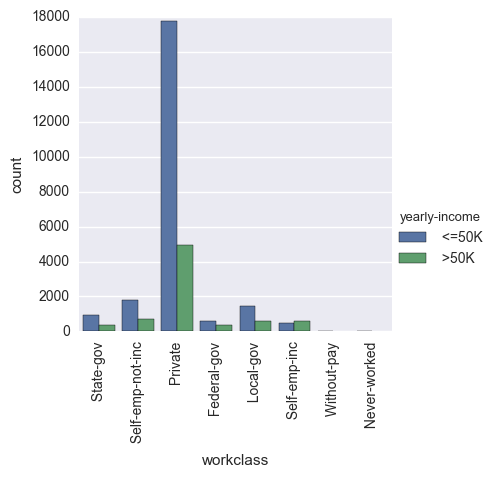

                   workclass  workclass
 Private               22696   0.697030
 Self-emp-not-inc       2541   0.078038
 Local-gov              2093   0.064279
 State-gov              1298   0.039864
 Self-emp-inc           1116   0.034274
 Federal-gov             960   0.029483
 Without-pay              14   0.000430
 Never-worked              7   0.000215 

education


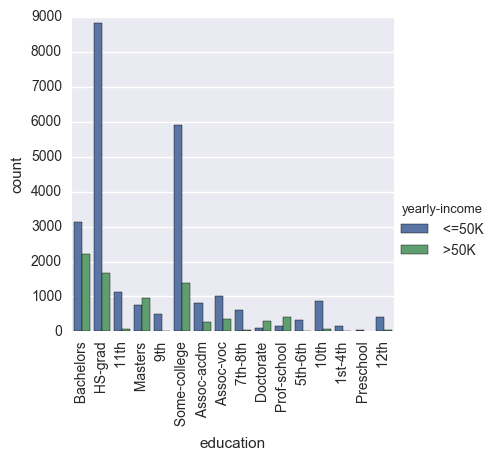

               education  education
 HS-grad           10501   0.322502
 Some-college       7291   0.223918
 Bachelors          5355   0.164461
 Masters            1723   0.052916
 Assoc-voc          1382   0.042443
 11th               1175   0.036086
 Assoc-acdm         1067   0.032769
 10th                933   0.028654
 7th-8th             646   0.019840
 Prof-school         576   0.017690 

marital-status


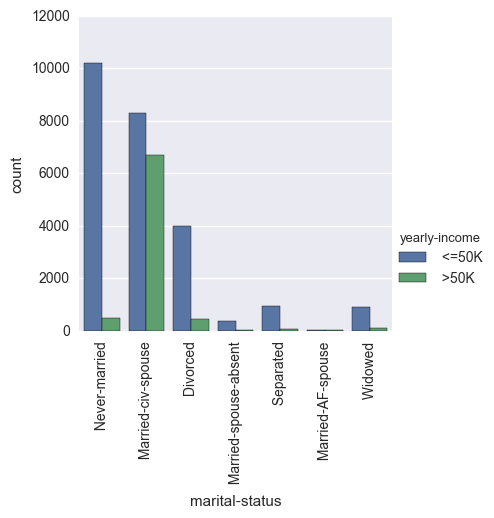

                        marital-status  marital-status
 Married-civ-spouse              14976        0.459937
 Never-married                   10683        0.328092
 Divorced                         4443        0.136452
 Separated                        1025        0.031479
 Widowed                           993        0.030497
 Married-spouse-absent             418        0.012837
 Married-AF-spouse                  23        0.000706 

occupation


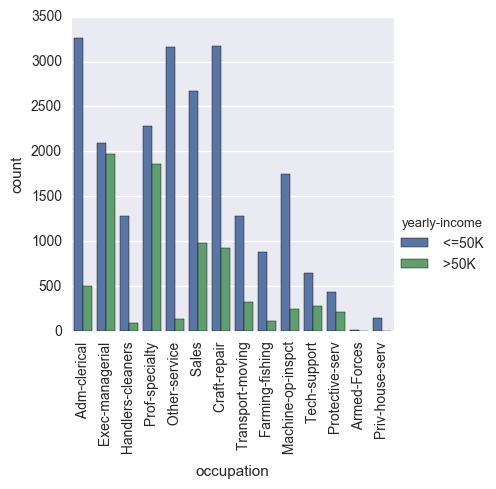

                    occupation  occupation
 Prof-specialty           4140    0.127146
 Craft-repair             4099    0.125887
 Exec-managerial          4066    0.124873
 Adm-clerical             3770    0.115783
 Sales                    3650    0.112097
 Other-service            3295    0.101195
 Machine-op-inspct        2002    0.061485
 Transport-moving         1597    0.049046
 Handlers-cleaners        1370    0.042075
 Farming-fishing           994    0.030527 

relationship


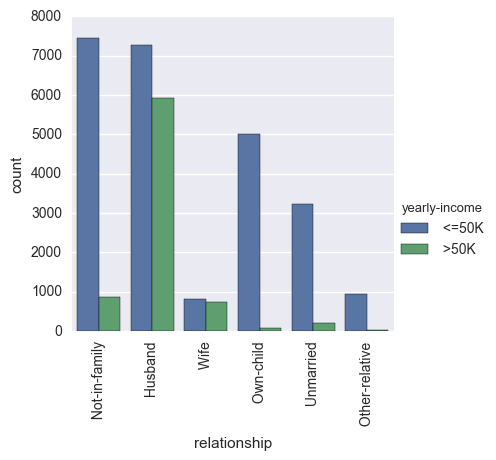

                 relationship  relationship
 Husband                13193      0.405178
 Not-in-family           8305      0.255060
 Own-child               5068      0.155646
 Unmarried               3446      0.105832
 Wife                    1568      0.048156
 Other-relative           981      0.030128 

race


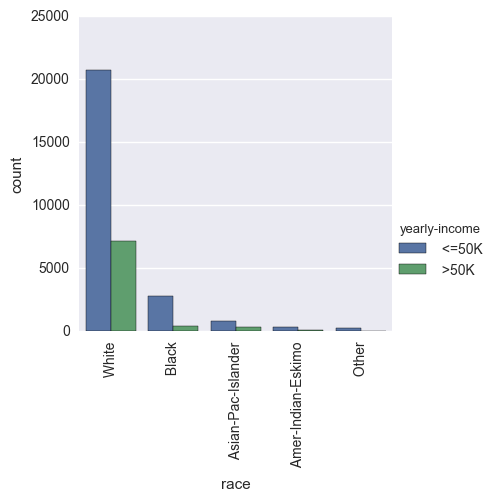

                      race      race
 White               27816  0.854274
 Black                3124  0.095943
 Asian-Pac-Islander   1039  0.031909
 Amer-Indian-Eskimo    311  0.009551
 Other                 271  0.008323 

sex


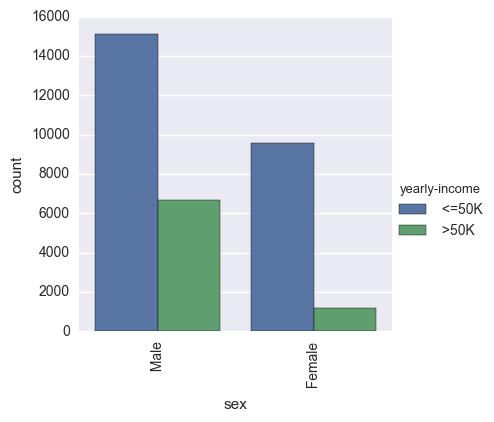

           sex       sex
 Male    21790  0.669205
 Female  10771  0.330795 

native-country


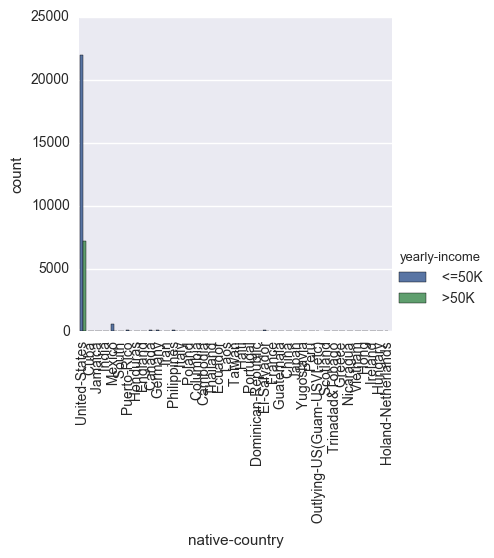

                native-country  native-country
 United-States           29170        0.895857
 Mexico                    643        0.019748
 Philippines               198        0.006081
 Germany                   137        0.004207
 Canada                    121        0.003716
 Puerto-Rico               114        0.003501
 El-Salvador               106        0.003255
 India                     100        0.003071
 Cuba                       95        0.002918
 England                    90        0.002764 

yearly-income


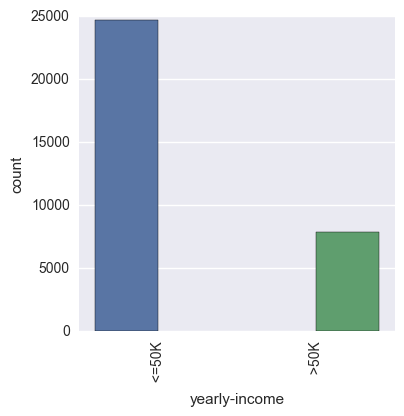

        yearly-income  yearly-income
 <=50K          24720        0.75919
 >50K            7841        0.24081 



In [433]:
#fig, axs = plt.subplots(ncols=5)

for i in df:
    
    if df[i].dtype =='object':
        count = df[i].value_counts()
        percent = df[i].value_counts() / df.shape[0]
        print( i)
        g = sns.factorplot(hue ="yearly-income", x = i, data = df,kind = 'count')
        g.set_xticklabels(rotation=90)
        sns.plt.show()
        print(pd.concat([count,percent], axis=1).head(10),'\n')
       



Base on the tables and the plots above, the data is mostly concentrated in the private employment(73.9%), USA(89.5%), white(85.6%) and male(67.7%).  

Even though this sample might be a good representation of the working-class population in the United States, the sample is dominated by white and male, so the prediction of other races or female 
may be inaccurate. It might be a good idea to scale the data such as upsampling and normalize.



#### Numerical variables

Secondly, we will read Describe the numeric data type attributes statistical values (count, mean, std, 25%percentile, 75 percentile, etc) in the table:

In [434]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


To better visualize these attributes, we plot their probability distribution plot to view and compare the shapes of distribution curves and to view areas under distribution curves corresponding to either probabilities or data values.  


/Users/Jesica/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


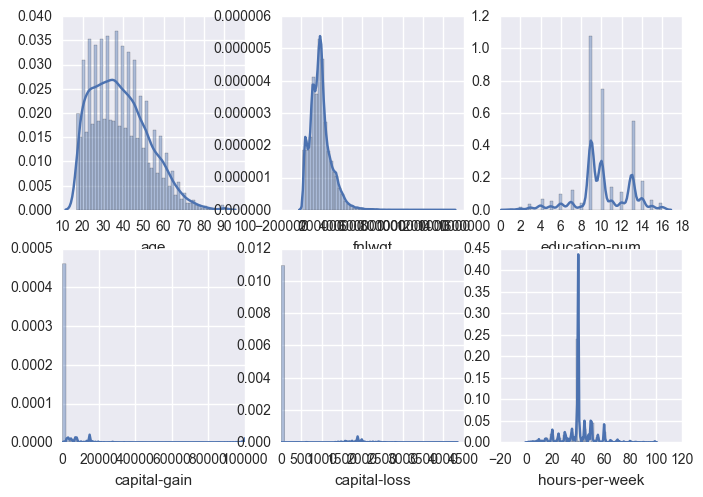

In [435]:
import matplotlib.gridspec as gridspec
#fig, axs = plt.subplots(ncols=6)

gs = gridspec.GridSpec(2,3)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[0,2])
ax4 = plt.subplot(gs[1,0])
ax5 = plt.subplot(gs[1,1])
ax6 = plt.subplot(gs[1,2])
axlist = [ax1,ax2,ax3,ax4,ax5,ax6]
axc = 0

for i in df:
    j = 0
    if df[i].dtype !='object':
        #sns.swarmplot(x = i, )
        sns.distplot(df[i],ax=axlist[axc])
        axc = axc+1

        #sns.plt.title(i)
        j+=1
sns.plt.show()

From above tables and plots, we can see that over 75% of capital gain and loss are 0. This is either missing value, or it is the reality. There are a few outliers at the hours per week attribute, which are over 80 hours. We need further information to decided if they are removable or not.

Capital gain and capital loss are extremely skewed so that it is not very informative, we can use **capital net(gain - loss)** to capture both features. 

Since most of the features in the dataset are categorical, and the numerical features seem to be non-linear, a tree ensemble algorithm might be a good classification tool in this case. To be specific, we will probably want to use a Random Forest algorithm or a Gradient Boosted Decision Trees algorithm.


## Q2: 
#### 2) Create visualizations (plots, histograms, etc.) that would help to:
 
    a) gain insight into the data;
    b) help to choose the appropriate machine learning method(s);
    c) suggest issues in the data that may need to be addressed.
 
    Include any relevant information that guided your choices.


Since our income is constructed as a categorical field, we would like to see multiple features interact with the response variable. 

#### 1. Age vs Race

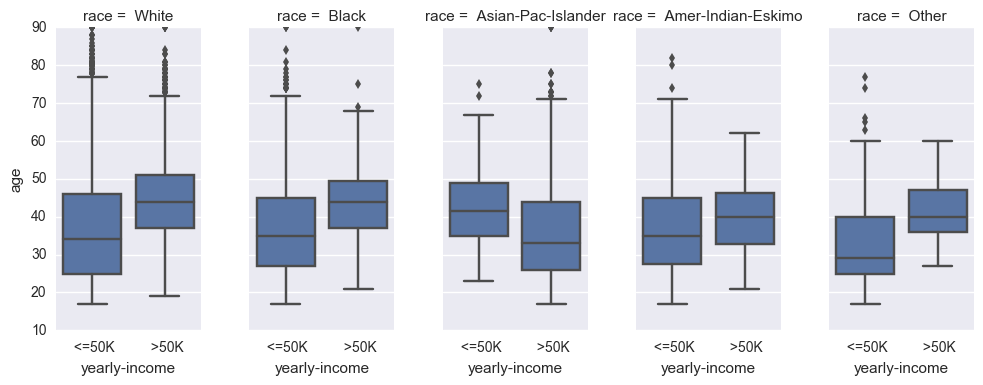

In [436]:
g = sns.FacetGrid(df, col='race', size=4, aspect=.5)
g = g.map(sns.boxplot, 'yearly-income', 'age')
sns.plt.show()

Similar to years of education below, people with salaries larger than 50k are elder (in distribution) in comparison to the people with their salaries lower than 50k  from the same race group, except for Asians.

#### 2.education vs race, sex

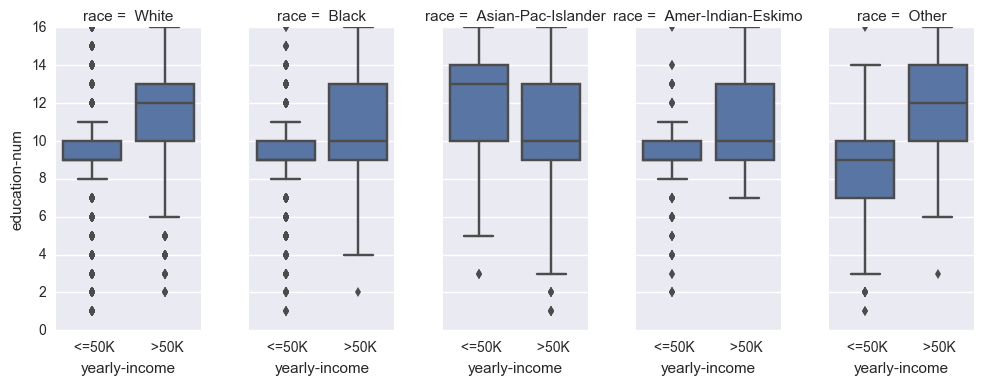

In [437]:
g = sns.FacetGrid(df, col = 'race', size = 4, aspect = 0.5)
g = g.map(sns.boxplot, 'yearly-income', 'education-num')
sns.plt.show()

Assume that our data is representable; people with salaries larger than 50k have higher education (in distribution) in comparison to the people with their salaries lower than 50k from the same racial group, except for Asians. The Asian education years VS income is strange, but since there are less than 1000 Asian in the sample, the result might not accurate.

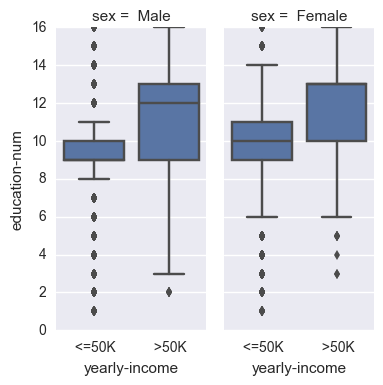

In [438]:
g = sns.FacetGrid(df, col='sex', size=4, aspect=.5)
g = g.map(sns.boxplot, 'yearly-income', 'education-num')
sns.plt.show()

In this graph, we can see that male with more than 10 years experience is much more likely to have more than 50k income. On the other hand, female whose income is less than 50k has more diverse and higher mean of education-num. Again, since the number of male is double the number of female in the graph, the female education variance is less  accurate.

In [439]:
df.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'yearly-income'],
      dtype='object')

#### 3.hours-per-week vs sex
    

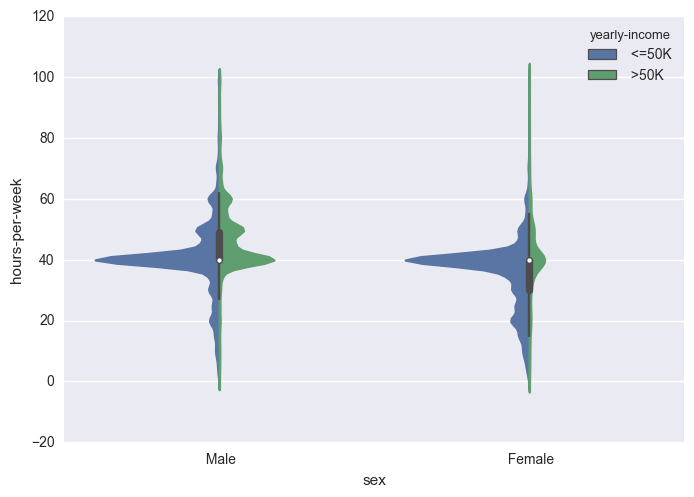

In [440]:
sns.violinplot(x='sex', y='hours-per-week', hue='yearly-income', data=df, split=True, scale='count')
sns.plt.show()



From above we can see that the majority of people work around 40 hours per week. Maybe part of the reason why larger proportion of male in the >50k class can be explained by the fact that the hours-per-week distribution for males is positively skewed, but that of females is negatively skewed. As indicated by this fact, a larger proportion of males works more than 40 hours-per-week than females. 

### Correlation heat plot

In [441]:
result = df.copy()
encoders = {}
for column in result.columns:
    if result.dtypes[column] == np.object:
        encoders[column] = preprocessing.LabelEncoder()
        result[column] = encoders[column].fit_transform(result[column].factorize()[0])


#### Encode categorical to numerical for ML training purposes and plot correlation heat map

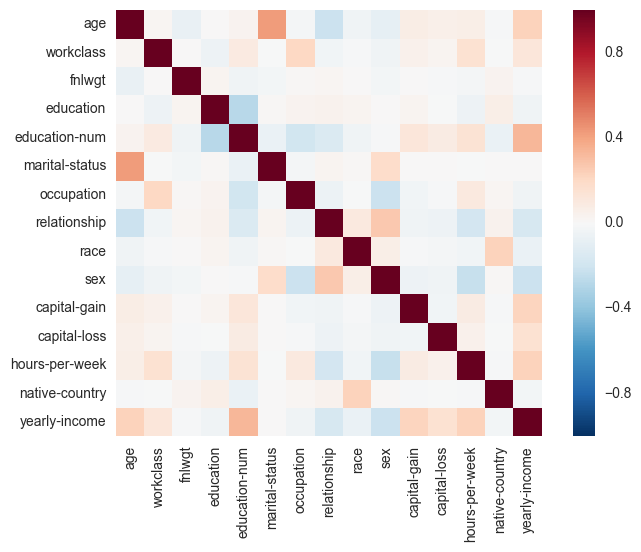

In [442]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column].factorize()[0])
    return result, encoders

# Calculate the correlation and plot it
encoded_data = number_encode_features(df)[0]
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

From the heat map of the correlation, we can see that Education and Education-Num are highly correlated since the later basically implies the former column. Forexample, for Education = 'Bachelors', most of the Education_Num = 13.
Since these two columns are representing the same thing, we share delete the string encoded one (**'education'**)

In [443]:
df[['relationship','sex']].head(10)

,relationship,sex
0,Not-in-family,Male
1,Husband,Male
2,Not-in-family,Male
3,Husband,Male
4,Wife,Female
5,Wife,Female
6,Not-in-family,Female
7,Husband,Male
8,Not-in-family,Female
9,Husband,Male


Also, we can see that relationship and sex are highly negatively related. From the table above, we can see that Male and husband, Female and wife are implications. But dropping either columns will loose other important information such as gender of not married people. 

In [444]:
df_new = df.drop('education', 1)

df_new['capital-net'] = df_new['capital-gain']-df_new['capital-loss']
df_new = df_new.drop(['capital-gain'],1)
df_new = df_new.drop(['capital-loss'],1)

### Comments on model selection:

Again, since the dataset is primarily composed of categorical variables, and the ratio of the types within each category are not balanced, I would suggest using decision tree based algorithm such as random forest, to avoid complexities introduced by the unbalanced feature types, and the non-linearity in the numerical features.

Logistic Regression will not work in this case because the numerical features are non-linear, and it does not handle categorical features well.

We can use svm, but since the this data set does not have many variables, we don't really need to reduce dimensions. Also, in this case we would have to use a non-linear kernel.

KNN will require some additional metrics to measrue the "clossness" of categorical variables such as native-country, (since there are not enough data).

We can also try bagging and boosting to train the model

### Comments on data:
Difficulties of dataset
1. Data set is relatively small
2. The minor groups are unbalanced, making information of minor groups less available

By runing simulation, we might be able to upsample the data of minor groups.

## Q3 3) Generate the following tables:
#### a.1) the mean hours-per-week 

In [445]:
df_new['hours-per-week'].mean()

40.437455852092995

In [446]:
bins = np.arange(15,100,10)
bins

array([15, 25, 35, 45, 55, 65, 75, 85, 95])

In [447]:
age = pd.concat([pd.cut(df_new['age'],bins),df_new['age']],axis = 1)
age.columns = ['bin', 'age']
age.groupby('bin').median()

,age
bin,
"(15, 25]",22
"(25, 35]",31
"(35, 45]",40
"(45, 55]",50
"(55, 65]",60
"(65, 75]",69
"(75, 85]",78
"(85, 95]",90


### b) calculate the median age for males and females, broken down by occupation.

In [448]:
df_new.groupby(['sex','occupation'])['age'].median()


sex      occupation        
 Female   Adm-clerical         35
          Craft-repair         39
          Exec-managerial      39
          Farming-fishing      39
          Handlers-cleaners    32
          Machine-op-inspct    37
          Other-service        33
          Priv-house-serv      41
          Prof-specialty       38
          Protective-serv      33
          Sales                29
          Tech-support         33
          Transport-moving     37
 Male     Adm-clerical         36
          Armed-Forces         29
          Craft-repair         38
          Exec-managerial      42
          Farming-fishing      39
          Handlers-cleaners    28
          Machine-op-inspct    36
          Other-service        31
          Priv-house-serv      23
          Prof-specialty       41
          Protective-serv      37
          Sales                38
          Tech-support         37
          Transport-moving     39
Name: age, dtype: int64

## Q4 Data Preperation

Plot all the features after selection. If I would go further with this project, I will do feature selection to further reduce the dimensions.

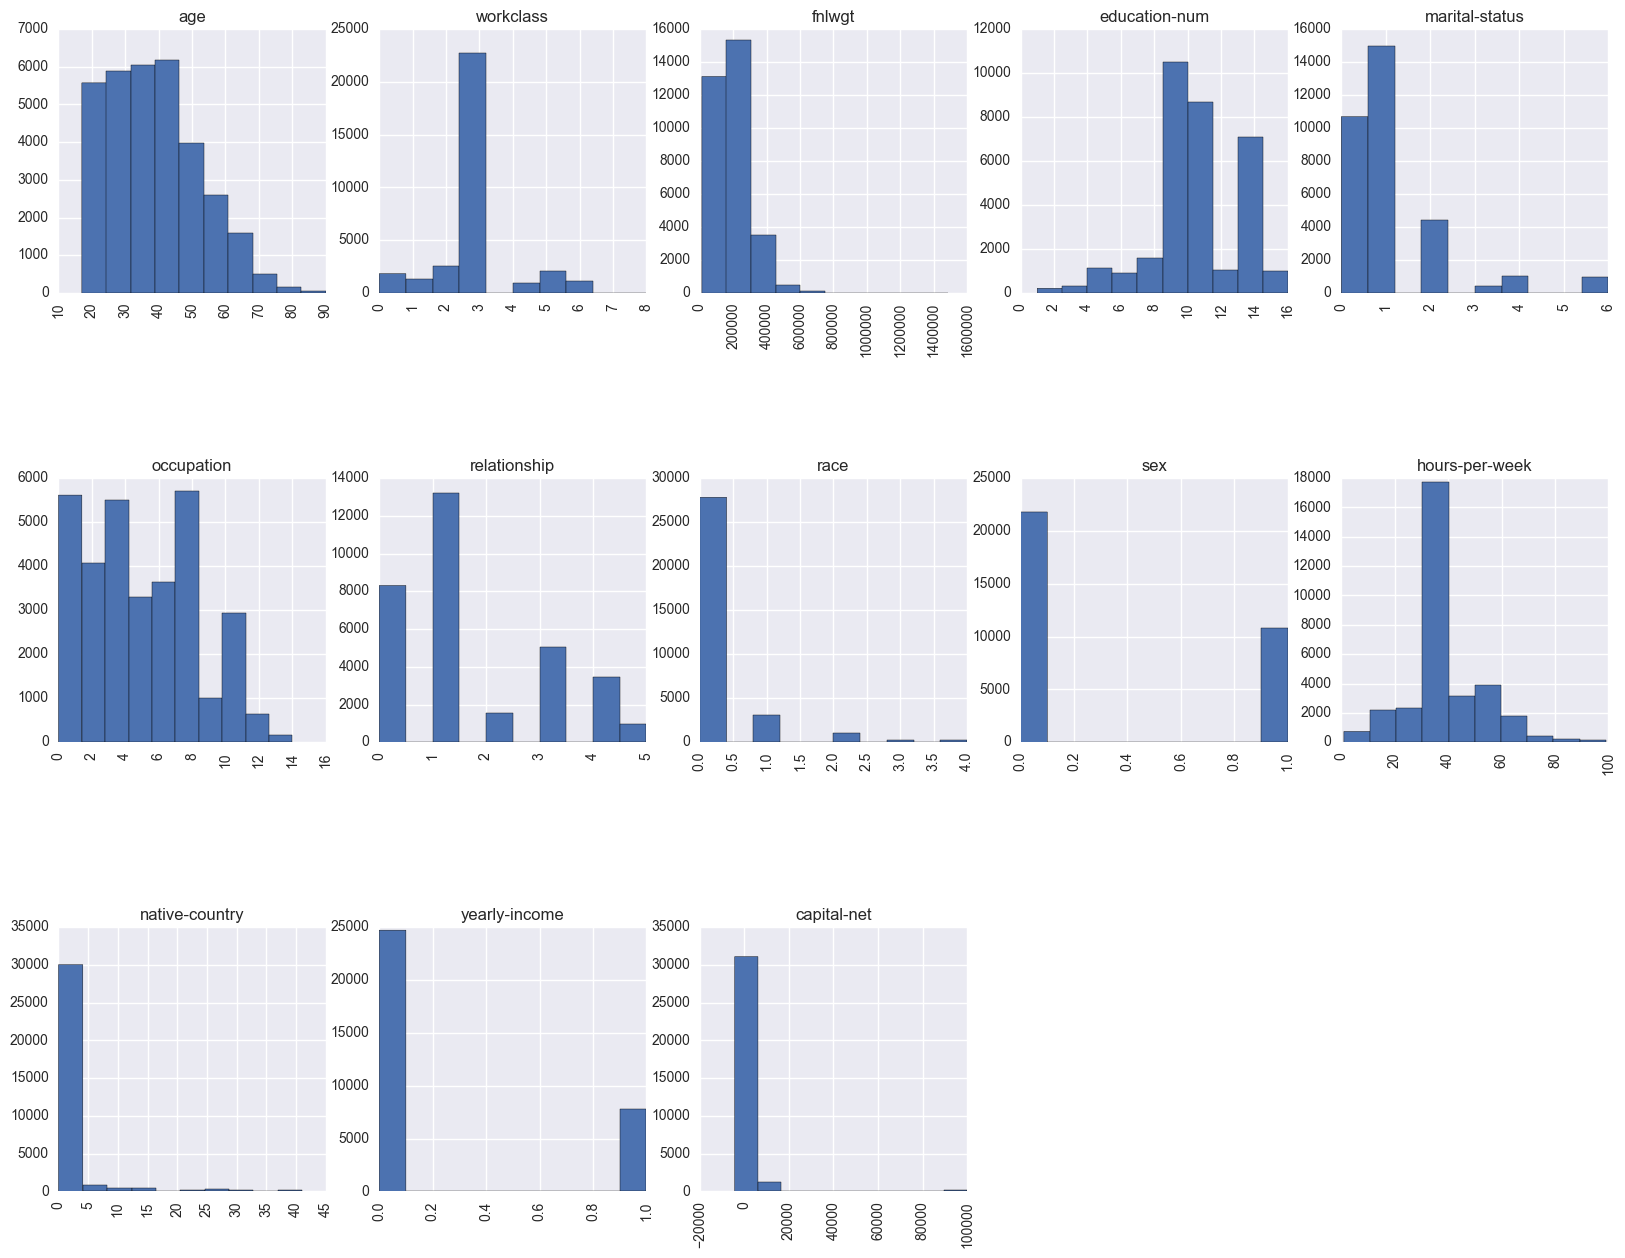

In [449]:
Leo Guoencoded_data = number_encode_features(df_new)[0]
fig = plt.figure(figsize=(20,15))
cols = 5
rows = (float(encoded_data.shape[1]) // cols) +1
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)
plt.show()

In [450]:
encoded_data.describe()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,yearly-income,capital-net
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,2.936734,1.897784e+05,10.080679,1.083781,4.962409,1.542397,0.221707,0.330795,40.437456,2.123031,0.240810,990.345014
std,13.640433,1.161177,1.055500e+05,2.572720,1.251381,3.187381,1.437431,0.627348,0.470506,12.347429,4.823427,0.427581,7408.986951
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-4356.000000
25%,28.000000,3.000000,1.178270e+05,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,40.000000,1.000000,0.000000,0.000000
50%,37.000000,3.000000,1.783560e+05,10.000000,1.000000,5.000000,1.000000,0.000000,0.000000,40.000000,1.000000,0.000000,0.000000
75%,48.000000,3.000000,2.370510e+05,12.000000,1.000000,7.000000,3.000000,0.000000,1.000000,45.000000,1.000000,0.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99.000000,41.000000,1.000000,99999.000000


### Data Loading
Create features/lables, train set and test set.

In [451]:

features = [col_name for col_name in encoded_data.columns if col_name !='yearly-income']
features.append('yearly-income')
target = 'yearly-income'
training_Size = 0.7
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[features],\
                                                                     encoded_data[target], \
                                                                     train_size=training_Size)


In [452]:
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.astype("f8")), columns=X_train.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test.astype("f8")), columns=X_train.columns)
train = X_train
train['yearly-income'] = y_train
test = X_test
test['yearly-income'] = y_test


In [453]:

out = csv.writer(open("features.csv","w"), delimiter=',',quoting=csv.QUOTE_ALL)
out.writerow(features)
train.to_csv(r'train.txt', header=True, index=True, sep=' ', mode='a')
test.to_csv(r'test.txt', header=True, index=True, sep=' ', mode='a')

### How does the choice of K-nearest neighbors as a machine learning method influence your representation of the data?

In order for K-nearest neighbors to perform well, we need to parse the data so that the training set (a subset of the complete dataset) is a good representation of the population, where the only information available to us is through the complete dataset. This means that for each combination of categorical variables, we will have to select a subset of data from the combination that also represents its numerical distribution, by sorting and selecting randomly from every p data entries (if we are using p-fold cross-validation), or by selecting one-out-of-p from completely randomized data from the combination. 

However, because our dataset is relatively small and unbalanced, and there are many categorical features, there might  not be enough data in each category combination to obtain a good representation of its population. To fix this, we are forced to assign metrics that measure the "clossness" of categorical variables. This can be done from two approaches:
(1) data - If we choose to give metrics that measure "clossness" of categories, we will need additional information regarding the categories.  

For example, if we want to measure the "clossness" of native country origin from the dataset, one natural choice of such metric is the geo-location of its capital. If we can get the longitudinal and latitudinal coordinates of the country's capital, we can use straight line distance as the measure. A better measure in this case is if we can represent a country by its culture, economy, religion, education, etc, we can use a normalized distance as the metric. However, this will require much more additional research and consume more computation power (not much of a problem if we store the distance matrix beforehand).  

**(2)** KNN implementation - We can also hardcode the distances between categorical features in the implementation of KNN algorithm. The simplest example is that we can assign 0 to two data points in the same category, and assign 1 to data points that are not in the same category. However, the scale of normalization for each feature might be harder to tune in this case. How do we know if the effect of different native country is larger than the effect of different marital status, if so, by how much. The same problem also exists in the first approach but should be easier to deal with since the effect is not as arbitrary.
  
To conclude, KNN is not the natural algorithm to go in this case. However, if we were to use KNN, the dataset will either have to be expanded by introducing natural numerical features that assign distance metrics to the categorical features, or hardcode distance metrics in the KNN implementation. In both cases, the parsing of dataset will follow the method described in paragraph one of this section.
